In [186]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gamma
from scipy.stats import norm

# Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

In [187]:
# параметры gamma распределения
a = 1.2

# задаем распределение и генерируем 1000 случайных значений из него
DistrGammaTh = gamma(a) 
DistrGammaRvs = DistrGammaTh.rvs(size=1000)

Text(0, 0.5, '$F(x)$')

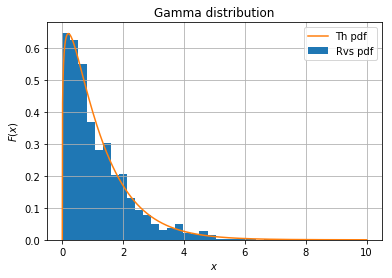

In [188]:
# гистограмма выборки
plt.hist(DistrGammaRvs, bins=30, normed=True, label='Rvs pdf')

# теоретическая плотность распределения случайной величины
x = np.linspace(0, 10, 1000)
pdf = DistrGammaTh.pdf(x)
plt.plot(x, pdf, label='Th pdf')
plt.legend()
plt.grid()
plt.title('Gamma distribution')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')

# Задача - оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. 

In [189]:
# генерируем выборочное среднее случайной величины (функция mean())
value = [0]*3
n = [5, 10, 50] 
for i in range(3):
    r = np.array([ DistrGammaTh.rvs(size=n[i]) for x in range(1000)])
    value[i] = r.mean(axis = 1)
    
# проверям справедливость центральной предельной теоремы
# вычисляем среднее (mu) и разброс (sigma)
# для подсчёта значений этих параметров нужно использовать именно теоретические среднее
# и дисперсию вашей случайной величины, а не их выборочные оценки.
EX = gamma.mean(a)
mu = EX*EX
std = gamma.std(a)
DX = std**3
sigma = [0]*3
for i in range(3):
    sigma[i] = np.sqrt(DX/n[i])

## 1000 выборок объемом 5

Text(0, 0.5, '$F(x)$')

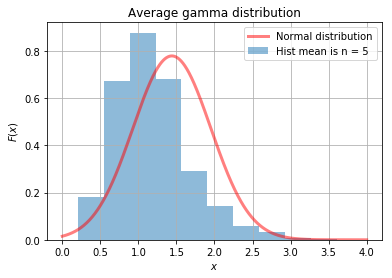

In [193]:
# далее идет 3 гистограммы выборочных средний гамма распределения

# нормальное распределение - приближение распределения выборочных средних по ЦПТ
norm_rv = norm(loc=mu, scale=sigma[0])
x = np.linspace(0, 4, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, 'r-', lw = 3, alpha= 0.5, label = 'Normal distribution')


plt.hist(value[0], normed = True, alpha = 0.5, label = 'Hist mean is n = ' + str(n[0]))
plt.legend()
plt.grid()
plt.title('Average gamma distribution')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')

## 1000 выборок объемом 10

Text(0, 0.5, '$F(x)$')

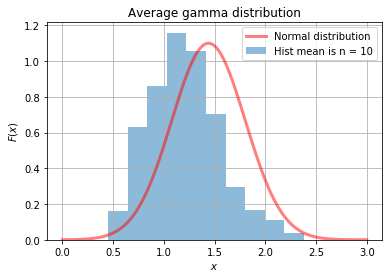

In [191]:
# нормальное распределение - приближение распределения выборочных средних по ЦПТ
norm_rv = norm(loc=mu, scale=sigma[1])
x = np.linspace(0, 3, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf,  'r-', lw = 3, alpha= 0.5, label = 'Normal distribution')

plt.hist(value[1], normed = True, alpha = 0.5, label = 'Hist mean is n = ' + str(n[1]))
plt.legend()
plt.grid()
plt.title('Average gamma distribution')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')

## 1000 выборок объемом 50

Text(0, 0.5, '$F(x)$')

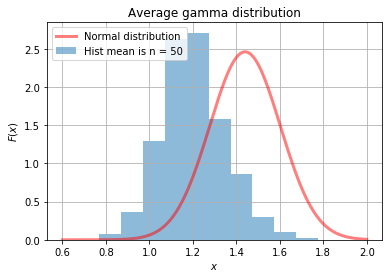

In [192]:
# нормальное распределение - приближение распределения выборочных средних по ЦПТ
norm_rv = norm(loc=mu, scale=sigma[2])
x = np.linspace(0.6, 2, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, 'r-', lw=3, alpha=0.5, label = 'Normal distribution')

plt.hist(value[2], normed = True, alpha = 0.5, label = 'Hist mean is n = ' + str(n[2]))
plt.legend()
plt.grid()
plt.title('Average gamma distribution')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')

# Вывод

Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что подтвержает справедливость центральной предельной теоремы
С ростом n точность нормальной аппроксимации увеличивается.